# Real-time Control of Stormwater Systems using Network Optimization 

1. Introduction
    - Problem Description
    - Literature Review
    - Contribution of the work
2. Model
3. Algorithm
4. Numerical Studies 
5. Conclusion 

In [1]:
# Python boilerplate 
import numpy as np
import scipy as spy
import matplotlib.pyplot as plt
%matplotlib notebook
%config InlineBackend.print_figure_kwargs = {}
import seaborn as sns
sns.set_style("whitegrid")
# Optimization thingy 
from gurobipy import *

## Introduction 

## Model
Dyanmics of the stormwater systems are nonlinear and these dynamics have to be accounted for achiving finer control of the system. But for achiving certain objective, like minimizing flooding and minimizing CSO's we can just control the network to effectively move the mass of water in the network, which can be achived by sorta linearnizing the system. 

### Virtual Tank Models

### Links:
Flow of water in the links is highly non-linear. Usually, we have to solve kinematic wave equation to model the flow of water in the links. But for this problem we ignore this, to assume that flow in and flow out are perfect. i.e no losses and more similar to the network links we have been looking in the class. 

### Nodes:
We assume that the Nodes are idealized cylinders. 

$$ V^t  = V^{t-1} + q_{in}^t - q_{out}^t $$

But the amount water that can leave the system is constrained by the water level in the tank. 

$$ q_{out} \leq \sqrt{2 \times g \times water level} \times C_D $$

We linearize this constaraint by approximating the square root operation. 

In [2]:
# Generate the outflows 
volume  = np.linspace(0,1000,100)
area    = 100
height  = volume/area
outflow = np.sqrt(2*9.81*height)

# Get the first order polyfit 
coeffws = np.polyfit(height, outflow, 1)

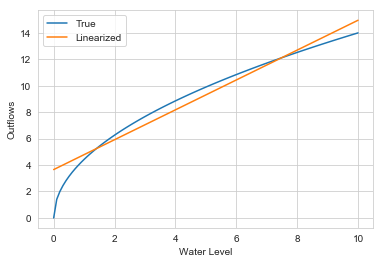

In [3]:
plt.plot(height, outflow, label = "True")
plt.plot(height, coeffws[0]*height + coeffws[1], label = "Linearized")
plt.ylabel("Outflows")
plt.xlabel("Water Level")
plt.legend()

Linearized version of the constraint:

$$ q_{out} \leq 1.13047751 \times volume/area + 3.65949363 $$

### Network Representation 

Network can be represented as a combination of multiple tanks (nodes) interconnected with links. 

### Control Problem 

Given a network with linear dynamics, how can we control to move water away from the network as fast as possible.

This control problem can be done in two ways. A centralized controller observes the network and routes the water from it. In the decentralized controller, we distribute the control problem. That is we have a central problem which tells the local controllers how to act. 

#### Centralized Controller 
**Terminology**
- $A$ links in the network
- $V_i^t$ volume in the $i^{th}$ tank at $t^{th}$ time
- $x_{ij}^t $ outflow from $i^{th}$ tank to $j^{th}$ at $t^{th}$ time
- $q_i^t$ inflow into $i^{th}$ tank at $t^{th}$ time
- $N$ is the number of tanks 
- $T$ time horizon for solving
- $u_{ij}$ is the upper bound for flow in link. 

***Objective Function***

If the objective is to minimize the utility in the tanks. 
$$ \min \sum^N_{i} \sum^T_t V_i^t $$

If the objective is to move water as fast as possible.
$$ \max \sum^N_{i} \sum^T_t x_{ij}^t $$
***Constraints***

_Mass Balance_:

This constraint accounts for the mass balance in the tanks. This constraint accounts for the time of travel between tanks($\delta_{ji}$). 

$$ V_i^t = V_i^{t-1} + q_i^{t-1} +  \sum_{j} x_{ji}^{t-\delta_{ji}} - \sum_{j} x_{ij}^{t-1}\ \text{for}\ \forall t\  \text{and}\ \forall i$$

_Flow thresholds_:
$$ x_{ij}^t \leq u_{ij}\ \text{for}\ \forall t\  \text{and}\ \forall ij \in A$$

_Outflow limitation_:

Amount of water that can be released from the tank at any time $t$ is limited by the volume in the tank. Though this relation is non-linear (i.e. $\sqrt{2*g*depth}$, we assume a linear relationship in this formulation.
$$ x_{ij}^t \leq f(V_{ij}^{t-1}) \ \text{for}\ \forall t\  \text{and}\ \forall ij \in A$$


## Algorithm

This can be solved using gurobi

## Numerical Studies

## Conclusion

array([1.13047751, 3.65949363])